
# NORMAL DISTR., WITH UNKNOWN PARAMS. & NON INFORMATIVE PRIOR: 


In [70]:
#install.packages("latex2exp")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [71]:
library(ggplot2)
library(gridExtra)
library(tidyr)
library(latex2exp)

 Simon Newcomb's 1882 data on the speed of light; 
 More precisely, the time it takes light to travel 7442 meters at sea level. 


In [2]:
# Newcomb's measurments 
Newcomb <- data.frame(Time = c(2.4828e-05, 2.4826e-05, 2.4833e-05, 2.4824e-05, 
                               2.4834e-05, 2.4756e-05, 2.4827e-05, 2.4816e-05, 2.484e-05, 2.4798e-05, 
                               2.4829e-05, 2.4822e-05, 2.4824e-05, 2.4821e-05, 2.4825e-05, 2.483e-05, 
                               2.4823e-05, 2.4829e-05, 2.4831e-05, 2.4819e-05, 2.4824e-05, 2.482e-05, 
                               2.4836e-05, 2.4832e-05, 2.4836e-05, 2.4828e-05, 2.4825e-05, 2.4821e-05, 
                               2.4828e-05, 2.4829e-05, 2.4837e-05, 2.4825e-05, 2.4828e-05, 2.4826e-05, 
                               2.483e-05, 2.4832e-05, 2.4836e-05, 2.4826e-05, 2.483e-05, 2.4822e-05, 
                               2.4836e-05, 2.4823e-05, 2.4827e-05, 2.4827e-05, 2.4828e-05, 2.4827e-05, 
                               2.4831e-05, 2.4827e-05, 2.4826e-05, 2.4833e-05, 2.4826e-05, 2.4832e-05, 
                               2.4832e-05, 2.4824e-05, 2.4839e-05, 2.4828e-05, 2.4824e-05, 2.4825e-05, 
                               2.4832e-05, 2.4825e-05, 2.4829e-05, 2.4827e-05, 2.4828e-05, 2.4829e-05, 
                               2.4816e-05, 2.4823e-05))

# units in nanoseconds, centered at 24800 
Newcomb$Time_ns <- (Newcomb$Time * 1e9) - 24800

# DATA 1: 
# there are two unusually low measurements  
y = Newcomb$Time_ns

# DATA 2: 
# eliminating the 'outliers'
yb = y[which(y > 0)]


# DATA 3: 
# simulated sample from the normal distr., with the same length as Newcomb's data
# The currently accepted estimate of the speed of light under these conditions 
# corresponds to a measurement of .00002483302, or 24833.02 nanoseconds
n <- length(y)
mu.true = 33.02 ; sigma.true= 11 # assumed to be the "true" values
x = rnorm(n,mu.true,sigma.true) 


In [3]:
# sufficient statistics
c(mean(x),sd(x))
c(mean(y),sd(y))
c(mean(yb),sd(yb))

[1] 32.67043 11.01674

[1] 26.21212 10.74532

[1] 27.750000  5.083431

## Marginal posterior of the median

Analytically: $\mu \mid x \sim t_{n-1} (\bar{x},s^2/n)$

This is, $\frac{\mu-\bar{x}}{s\sqrt{n}} \sim t_{n-1}$ , an standard t-distribution with n-1 dof 


In [4]:
### 95% central post. interval for mu:
c(mean(x) - qt(.975,n-1)*sd(x)/sqrt(n), mean(x) + qt(.975,n-1)*sd(x)/sqrt(n))

## the true value for mu in Newcomb's experiment, 33.02, falls outside the 95% interval from Newcomb's data. 
c(mean(y) - qt(.975,n-1)*sd(y)/sqrt(n), mean(y) + qt(.975,n-1)*sd(y)/sqrt(n))

## even after the elimination of possible outliers from the data 
c(mean(yb) - qt(.975,length(yb)-1)*sd(yb)/sqrt(length(yb)), mean(yb) + qt(.975,length(yb)-1)*sd(yb)/sqrt(length(yb)))

[1] 29.96217 35.37868

[1] 23.57059 28.85365

[1] 26.4802 29.0198

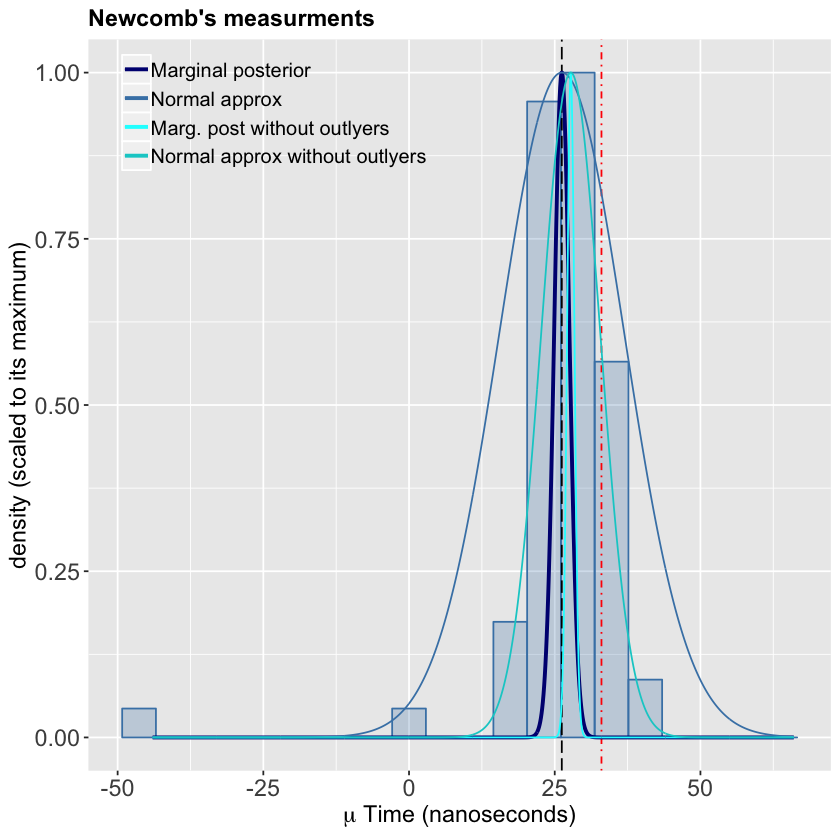

In [6]:
### Compute the exact marginal density for mu
df.mu <- data.frame(mu = seq(min(mu.true - 3*sigma.true,y), max(mu.true + 3*sigma.true,y), length.out = 1000))
## multiply by 1./sqrt(s2/n) = n/s, due to the transformation of variable z=(x-mean(y))/sqrt(s2/n)
df.mu$pm1 <- dt((df.mu$mu - mean(y)) / sqrt(var(y)/n), n-1) * n/sd(y)
df.mu$pm1b <- dt((df.mu$mu - mean(yb)) / sqrt(var(yb)/length(yb)), length(yb)-1) * length(yb)/sd(yb)
df.mu$pm2 <- dt((df.mu$mu - mean(x)) / sqrt(var(x)/n), n-1) * n/sd(x)
## normal approximation:
df.mu$nappr1 <- dnorm(df.mu$mu,mean(y),sd(y))
df.mu$nappr1b <- dnorm(df.mu$mu,mean(yb),sd(yb))
df.mu$nappr2 <- dnorm(df.mu$mu,mean(x),sd(x))


p.pm1 <- ggplot() +
  geom_histogram(aes(y,..ndensity..), bins=20, # Defaults to 30; # binwidth = 5,
                 fill = 'steelblue', alpha=0.25, color = 'steelblue') + 
  geom_vline(xintercept = c(33.02,mean(y)), linetype=c('dotdash','longdash'),col=c(2,1)) + # true mean & suff. statistic of mu
  # marginal post. density of mu
  geom_line(data = df.mu,aes(mu,pm1/max(pm1),col='1'),lwd=1.1) + 
  # normal approx.
  geom_line(data = df.mu,aes(mu,nappr1/max(nappr1),col='2')) +   
  # case 2: eliminating possible outliers
  geom_line(data = df.mu,aes(mu,pm1b/max(pm1b),col='3')) + # marginal post. density of mu
  geom_line(data = df.mu,aes(mu,nappr1b/max(nappr1b),col='4')) + # normal approx.  
  labs(title = "Newcomb's measurments", 
       x = expression(paste(mu,' Time (nanoseconds)')), y='density (scaled to its maximum)') +
  scale_color_manual(values=c('navyblue','steelblue','cyan','cyan3'), 
                     labels = c("Marginal posterior","Normal approx",
                                "Marg. post without outlyers","Normal approx without outlyers")) +
  theme(axis.text=element_text(size=14),
        axis.title.y  = element_text(size=14),
        axis.title.x = element_text(size = 14),
        plot.title=element_text(size=14,face="bold"),
        legend.background = element_blank(),
        legend.position = c(0.25, 0.9),
        legend.text= element_text(size = 12),
        legend.title = element_blank())
  

p.pm1

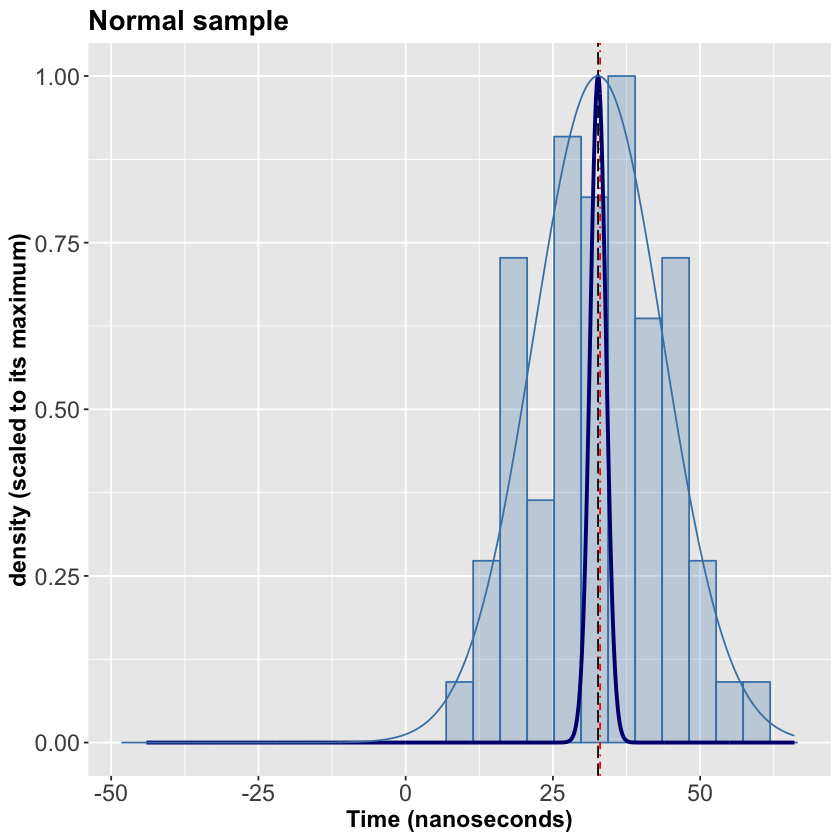

In [7]:
# Same but for a normal sasmple
p.pm2 <- ggplot() +
  geom_histogram(aes(x,..ndensity..), bins=25, # Defaults to 30; # binwidth = 5,
                 fill = 'steelblue', alpha=0.25, color = 'steelblue') + 
  geom_vline(xintercept = c(33.02,mean(x)), linetype=c('dotdash','longdash'),col=c(2,1)) + # true mean & suff. statistic of mu
  geom_line(data = df.mu,aes(mu,pm2/max(pm2)),lwd=1.1,col='navyblue') +
  geom_line(data = df.mu,aes(mu,nappr2/max(nappr2)),col='steelblue') +
  labs(title = 'Normal sample', 
       x = 'Time (nanoseconds)', y='density (scaled to its maximum)') +
  theme(axis.text=element_text(size=14),
        title=element_text(size=14,face="bold"))

p.pm2 

#grid.arrange(p.pm1, p.pm2 , ncol=1)

## SAMPLE FROM THE JOINT POSTERIOR 

Using the factorization : $p(\mu,\sigma^2|x)= p(\mu|\sigma^2,x)p(\sigma^2|x)$

- Draw $\sigma^2$ from marginal posterior distribution $p(\sigma^2|x)= Inv-\chi^2(n-1,s_c^2)$,
i.e., $\sigma^2 = \frac{(n-1)s_c^2}{\chi_{n-1}^2}$

- Given $\sigma^2$, draw $\mu$ from conditional posterior distribution
$p(\mu|\sigma^2,x) = N(\bar{x},\sigma^2/n)$ 

In [11]:
### 1.- Draw sigma2 (variance) from its marginal post. d: p(sigma2|y) ~ Inv-chi-squared (n-1,s^2)

## helper functions to sample from and evaluate scaled inverse chi-squared distribution
rsinvchisq <- function(n, nu, s2, ...) nu*s2 / rchisq(n , nu, ...)

dsinvchisq <- function(x, nu, s2){
  exp(log(nu/2)*nu/2 - lgamma(nu/2) + log(s2)/2*nu - log(x)*(nu/2+1) - (nu*s2/2)/x)
}

## sample 1000 random numbers from p(sigma2|y)
sigma2.sample  <- rsinvchisq(1000, n-1, var(y))

# sample of the standard deviation
sigma.sample  <- sqrt(sigma2.sample)

#hist(sigma2.sample)

In [10]:
### 2.- Given sigma2, draw mu from its cond post. d: p(mu|sigma2,y) ~ N(mx,sigma^2/n)

# sample from p(mu|sigma2,y)
mu.sample <- mean(y) + sqrt(sigma2.sample/n)*rnorm(1000)

ms2.sample <- data.frame(mu = mu.sample,sigma2 = sigma2.sample,sigma = sigma.sample)

#hist(mu.sample)

## Marginal posterior of the mean

In [23]:
## (i) Marginal posterior of mu 
dfm <- data.frame(mu = seq(floor(min(mu.sample,mu.true-5)), # ranges for the grid on mu
                           ceiling(max(mu.sample,mu.true+5)), length.out = 1000))

# compute the exact marginal density of mu
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable z=(x-mean(y))/sqrt(s2/n)
dfm$pm <- dt((dfm$mu-mean(y)) / sqrt(var(y)/n), n-1) / sqrt(var(y)/n)

# estimate the marginal density using samples and ad hoc Gaussian kernel approximation
dfm$pmk <- density(mu.sample, adjust = 2, n = 1000, from = min(dfm$mu), to = max(dfm$mu))$y

# compute the conditional post. d. of mu, given one draw from marg. post. of sigma2
dfm$pc <- dnorm(dfm$mu, mean(y), sqrt(sigma2.sample[1]/n))

# create a plot of the marginal density of mu
margmu <- ggplot(dfm) +
  geom_histogram(data = data.frame(mu.sample),aes(mu.sample,..ndensity..,fill='1'), 
                 bins=25, col = 'steelblue', alpha=0.1) + 
  geom_line(aes(mu, pm/max(pm), color = '1'),lwd=1.2) +
  geom_line(aes(mu, pmk/max(pmk), color = '2'),lwd=1.2) +
  #geom_line(aes(mu, pc/max(pc), color = '3'),lwd=1.2,linetype = 'dotted') +
  geom_vline(xintercept = c(mu.true,mean(y)), linetype=c('longdash','dotdash'),col=c(2,1)) + # true mean & Mode of mu
  scale_fill_manual(values = 'steelblue', labels=c('Sample')) +
  scale_color_manual(values=c('cyan3','steelblue','blue'), labels = c('Exact','Empirical','Cond. post.')) +
  labs(title = expression(paste('Marginal posterior of ',mu)), x = '', y = '') +
  scale_y_continuous(breaks = NULL) +
  theme(axis.text=element_text(size=14),
        plot.title=element_text(size=14,face="bold",hjust=0.5),
        legend.text=element_text(size=10),
        legend.background = element_blank(),
        legend.position = c(0.85, 0.8),
        legend.title = element_blank())

#margmu

## Marginal posterior of the variance

In [24]:
## (ii) Marginal posterior of sigma2 
dfs <- data.frame(sigma2 = seq(floor(min(sigma2.sample)), # ranges for the grid on sigma2
                           ceiling(max(sigma2.sample)), length.out = 1000),
                  sigma = seq(floor(min(sigma.sample,sigma.true)), # ranges for the grid on sigma
                               ceiling(max(sigma.sample,sigma.true)), length.out = 1000))

# compute the exact marginal density 
dfs$ps2 <- dsinvchisq(dfs$sigma2, n-1, var(y)) # of sigma2
dfs$ps <- dsinvchisq(dfs$sigma2^2, n-1, var(y)) * 2*dfs$sigma2 # of sigma
## In case of exact marginal density of sigma, the multiplication by 
## 2*sigma2.grid is due to the transformation of variable y = x^2 (sigma2=(sigma)^2)

# estimate the marginal density using samples and ad hoc Gaussian kernel approximation
dfs$ps2k <- density(sigma2.sample, n = 1000, from = min(dfs$sigma2), to = max(dfs$sigma2))$y
dfs$psk <- density(sigma.sample, n = 1000, from = min(dfs$sigma2), to = max(dfs$sigma2))$y


# create a plot of the marginal density of sigma
margsig <- ggplot(dfs) +
  geom_histogram(data = data.frame(sigma2.sample),aes(sigma2.sample,..ndensity..,fill='1'), 
                 bins=25,col = 'steelblue', alpha=0.1) + 
  geom_line(aes(sigma2, ps2/max(ps2), color = '1'),lwd=1.2) +
  geom_line(aes(sigma2, ps2k/max(ps2k), color = '2'),lwd=1.2) +
  geom_vline(xintercept = c(sigma.true^2,(n-1)/(n+1)*var(y)), # true mean & Mode of sigma2
             linetype=c('longdash','dotdash'),col=c(2,1)) + 
  coord_flip() +
  scale_fill_manual(values = 'steelblue', labels=c('Sample')) +
  scale_color_manual(values=c('cyan3','steelblue'), labels = c('Exact','Empirical')) +
  labs(title = expression(paste('Marginal posterior of ',sigma^2)), x = '', y = '') +
  #scale_x_continuous(limits = range(dfs$sigma2)) + 
  scale_y_continuous(breaks = NULL) +
  theme(axis.text=element_text(size=14),
        plot.title=element_text(size=14,face="bold",hjust=0.5),
        legend.text=element_text(size=10),
        legend.background = element_blank(),
        legend.position = c(0.85, 0.8),
        legend.title = element_blank())

#margsig


## Joint posterior distribution for both parameters

In [25]:
## (iii) Joint posterior d. 
# combine grid points into another data frame, with all pairwise combinations
df.jpost <- data.frame(mu = rep(dfm$mu, each = length(dfs$sigma2)), 
                       sigma2 = rep(dfs$sigma2, length(dfm$mu)),
                       sigma = rep(dfs$sigma, length(dfm$mu)))

## evaluate the joint density in the grid
## note that the following is not normalized, but for plotting contours it does not matter
df.jpost$jp <- dsinvchisq(df.jpost$sigma2, n-1, var(y)) * dnorm(df.jpost$mu, mean(y), sqrt(df.jpost$sigma2/n))
df.jpost$jp.sig <- dsinvchisq(df.jpost$sigma^2, n-1, var(y)) * 2*df.jpost$sigma * dnorm(df.jpost$mu, mean(y), df.jpost$sigma/sqrt(n))
## evaluate the joint prior density in the grid (uninformative)
df.jpost$pr <- 1 /df.jpost$sigma2
df.jpost$pr.sig <- 1/df.jpost$sigma


## breaks for plotting the contours
#cl <- seq(1e-5, max(df.jpost$jp), length.out = 6)
cl <- quantile(df.jpost$jp,c(0.25,0.5,0.75,0.85,0.95,0.99))
cl2 <- quantile(df.jpost$jp.sig,c(0.25,0.5,0.75,0.85,0.95,0.99))

# create a plot of the joint density
joint <- ggplot() +
  geom_point(data = ms2.sample, aes(mu, sigma2, col = '1'), size = 1) +
  geom_point(aes(mu.true,sigma.true^2),size=3,col='red') + 
  geom_point(aes(mean(y),(n-1)/(n+1)*var(y)),size=3,col='cyan') + # Modes from the marginal post. d.
  geom_contour(data = df.jpost, aes(mu, sigma2, z = jp, col = '2'), breaks = cl) +
  #coord_cartesian(xlim = range(dfm$mu),ylim = range(dfs$sigma2)) +
  labs(title = expression(paste('Joint posterior p(', mu,',',sigma^2,'|x)')), 
       x = expression(mu), y = expression(sigma^2)) +
  scale_color_manual(values=c('steelblue', 'cyan3'), labels = c('Sample','Exact contour')) +
  guides(color = guide_legend(nrow  = 1, override.aes = list(shape = c(16, NA), linetype = c(0, 1), size = c(2, 1)))) +
  theme(axis.text=element_text(size=14),
        axis.title.x = element_text(size = 14),
        axis.title.y  = element_text(size=14,angle=0,vjust = 0.5),
        plot.title=element_text(size=16,face="bold",hjust=0.5),
        legend.text=element_text(size=12),
        legend.background = element_blank(),
        legend.position = c(0.5, 0.9),
        legend.title = element_blank())

#joint

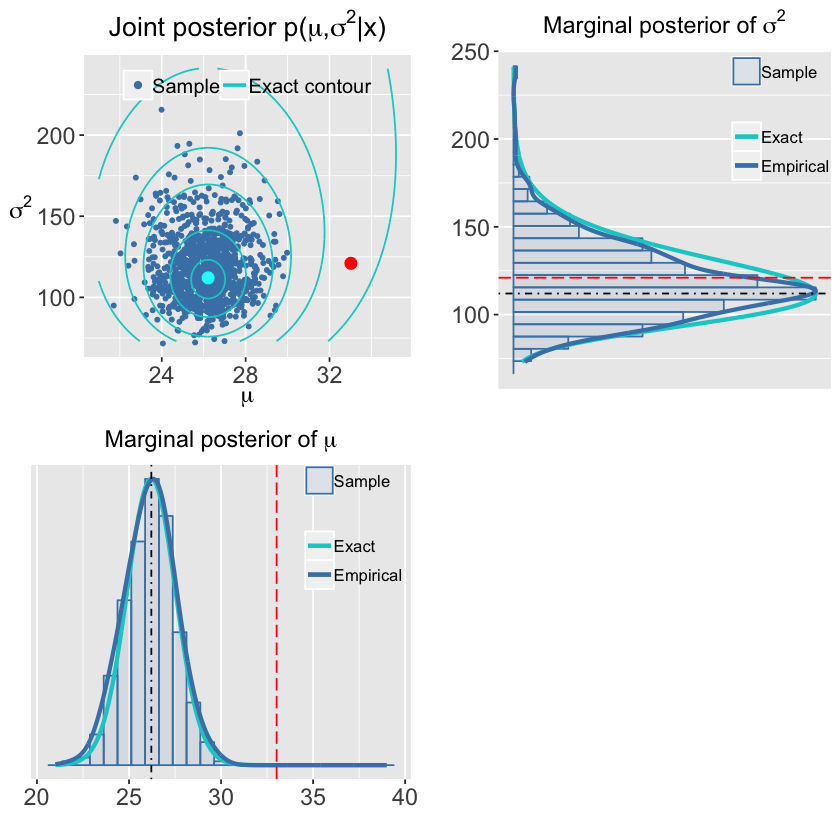

In [26]:
## Visualise the joint posterior density, marginal densities of the posteriors,
# and factored sampling and the corresponding conditional density 
## of normal distribution with unknown mean and variance.
grid.arrange(joint, margsig, margmu, nrow = 2)


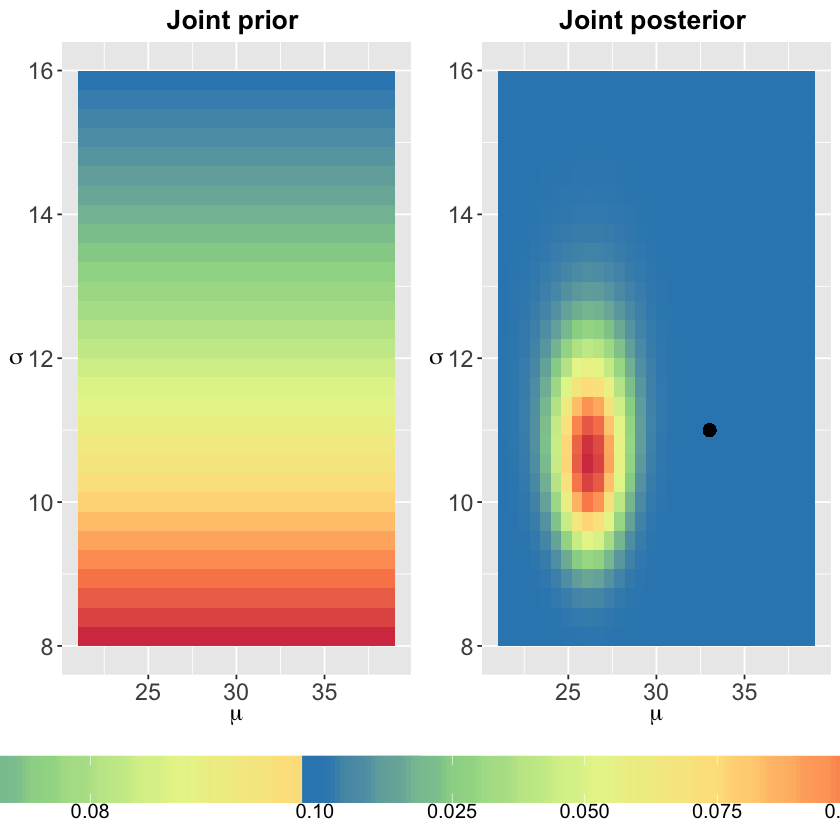

In [34]:
## Visualise the joint prior (non-informative) vs. joint posterior 
## of normal distribution with unknown mean and variance.

prior2d <- ggplot(data = df.jpost, aes(mu, sigma,z = pr.sig)) +
  stat_summary_2d() +
  labs(title = 'Joint prior ', x = expression(mu), y = expression(sigma)) +
  scale_fill_distiller(palette= "Spectral", direction=-1) +
  theme(axis.text=element_text(size=14),
        axis.title.x = element_text(size = 14),
        axis.title.y  = element_text(size=14,angle=0,vjust = 0.5),
        plot.title=element_text(size=16,face="bold",hjust=0.5),
        legend.text=element_text(size=12),
        legend.background = element_blank(),
        legend.key.size = unit(3, "cm"),
        legend.key.height  = unit(1,"cm"),
        legend.position = 'bottom',        
        legend.title = element_blank())


joint2d <- ggplot(data = df.jpost, aes(mu, sigma,z = jp.sig)) +
  stat_summary_2d() +
  geom_point(aes(mu.true,sigma.true),size=3) + 
  labs(title = 'Joint posterior ', x = expression(mu), y = expression(sigma)) +
  scale_fill_distiller(palette= "Spectral", direction=-1) +
  theme(axis.text=element_text(size=14),
        axis.title.x = element_text(size = 14),
        axis.title.y  = element_text(size=14,angle=0,vjust = 0.5),
        plot.title=element_text(size=16,face="bold",hjust=0.5),
        legend.text=element_text(size=12),
        legend.background = element_blank(),
        legend.key.size = unit(3, "cm"),
        legend.key.height  = unit(1,"cm"),
        legend.position = 'bottom',
        legend.title = element_blank())

#joint2d

grid.arrange(prior2d, joint2d, ncol = 2)

## THE POSTERIOR PREDICTIVE DISTRIBUTION (Model Checking)


In [35]:
## Visualise sampling from the posterior predictive distribution.
## To draw from the post. predictive d. : 
### 1. Draw (mu,sigma2) from joint post. d ==> sigma2.sample & mu.sample
### 2. Then simulate future observ. from N(mu,sigma2)

# sample from predictive distribution p(ynew|y) for each sample of (mu, sigma)
ynew.sample <- rnorm(1000, mu.sample, sigma.sample)

# data frame of two draws from sample the predictive along
# with the exact value for plotting
dfp <- data.frame(ynew = seq(floor(min(ynew.sample)), # ranges for the grid
                             ceiling(max(ynew.sample)), length.out = 1000))

# calculate each predictive pdf with given mu and sigma
dfp$pp.draw = dnorm(dfp$ynew, mu.sample[1], sigma.sample[1]) # take the first draw from the sample
dfp$pp.draw2 = dnorm(dfp$ynew, mu.sample[1000], sigma.sample[1000]) # take the last draw from the sample
# compute the exact post. predictive density
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
dfp$pp.exact = dt((dfp$ynew-mean(y)) / sqrt(var(y)*(1+1/n)), n-1) / sqrt(var(y)*(1+1/n)) 


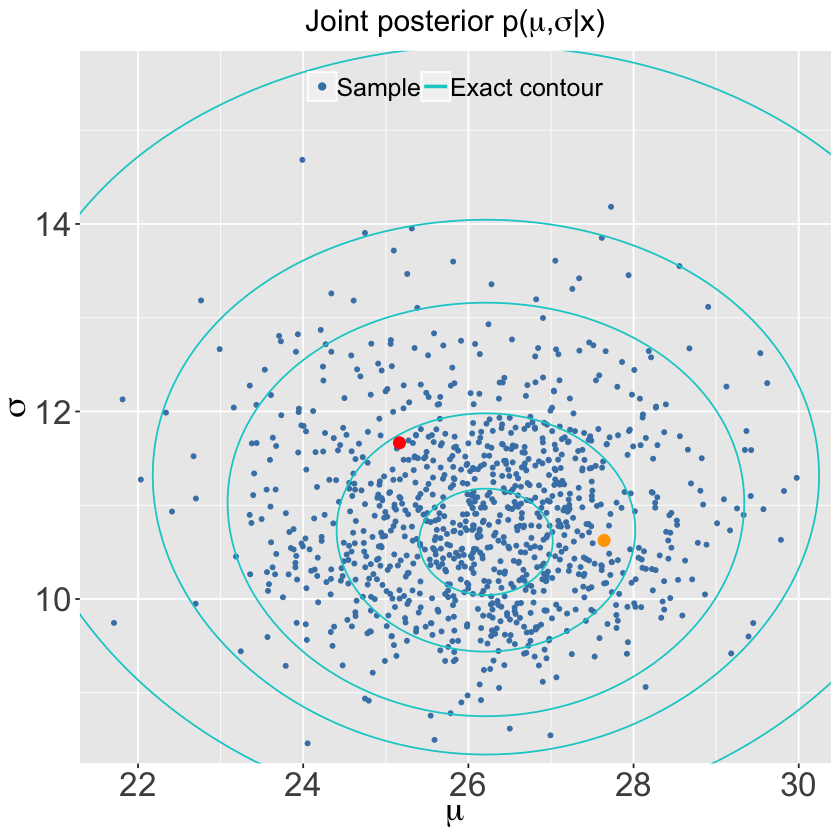

In [36]:
# create yet another plot of the joint posterior with the two draws
# from the posterior predictive distribution, highlight the first and last sample
joint3 <- ggplot() +
  geom_point(data = ms2.sample, aes(mu, sigma, col = '1'), size = 1) +
  geom_contour(data = df.jpost, aes(mu, sigma, z = jp.sig, col = '2'), breaks = cl2) +
  geom_point(data = data.frame(x = mu.sample[1], y = sigma.sample[1]), aes(x, y), 
             size = 3, color = 'red') +
  geom_point(data = data.frame(x = mu.sample[1000], y = sigma.sample[1000]), aes(x, y), 
             size = 3, color = 'orange') +
  coord_cartesian(xlim = range(mu.sample),ylim = range(sigma.sample)) +
  labs(title = expression(paste('Joint posterior p(', mu,',',sigma,'|x)')), 
       x = expression(mu), y = expression(sigma)) +
  scale_color_manual(values=c('steelblue', 'cyan3'), labels = c('Sample','Exact contour')) +
  guides(color = guide_legend(nrow  = 1, override.aes = list(shape = c(16, NA), linetype = c(0, 1), size = c(2, 1)))) +
  theme(axis.text=element_text(size=20),
        axis.title = element_text(size = 20),
        plot.title=element_text(size=18,face="bold",hjust=0.5),
        legend.text=element_text(size=15),
        legend.background = element_blank(),
        legend.position = c(0.5, 0.95),
        legend.title = element_blank())

joint3


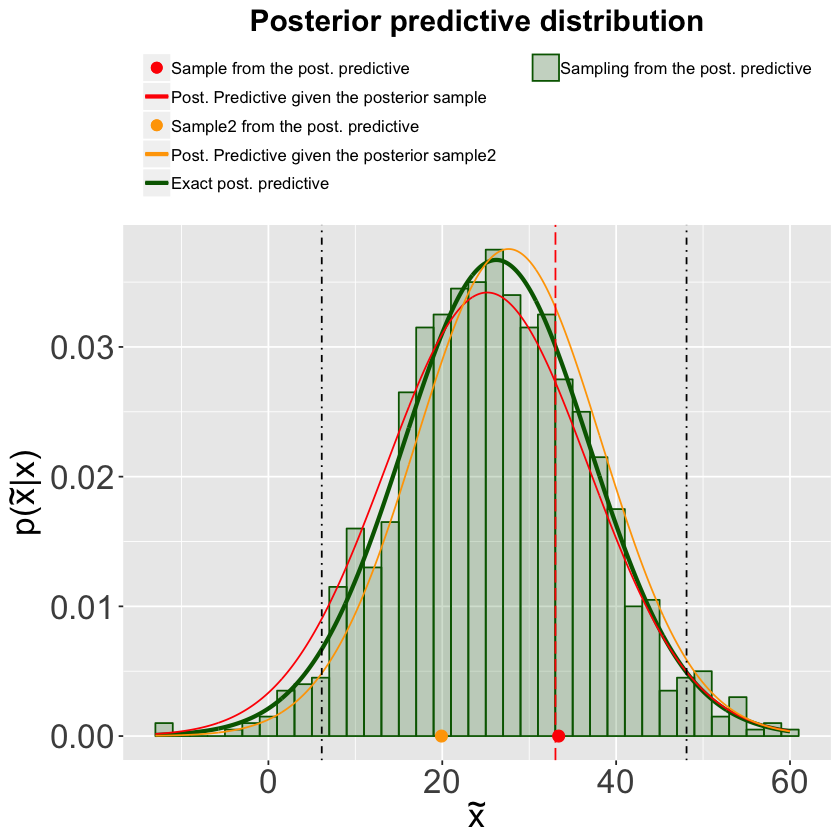

In [41]:
# create a plot of the predictive distribution and the respective sample,
# along with the post. predictive sampling 
predlabs <- c('Sample from the post. predictive','Post. Predictive given the posterior sample',
              'Sample2 from the post. predictive', 'Post. Predictive given the posterior sample2',
              'Exact post. predictive')

pred <- ggplot() +
  geom_histogram(data=data.frame(ynew = ynew.sample),aes(ynew,..density..,fill='1'),
                 binwidth=2,col = 'darkgreen', alpha=0.2) +
  geom_line(data = dfp, aes(ynew, pp.exact, color = '5'),lwd=1.2) +
  geom_point(data = data.frame(x = ynew.sample[1], y = 0), aes(x, y, color = '1'),size=3) +
  geom_line(data = dfp, aes(ynew, pp.draw, color = '2')) +
  geom_point(data = data.frame(x = ynew.sample[1000], y = 0), aes(x, y, color = '3'),size=3) +
  geom_line(data = dfp, aes(ynew, pp.draw2, color = '4')) +
  # Add the posterior 2.5% and 97.5% quantiles : 95% post. Credible interval
  geom_vline(xintercept = quantile(ynew.sample,c(0.025,0.975)), linetype='dotdash') +
  # Add the true mean value
  geom_vline(xintercept = mu.true, linetype='longdash',col='red') +
  #coord_cartesian(xlim = range(xynew), ylim = c(0,0.04)) +
  labs(title = 'Posterior predictive distribution', x = expression(tilde(x)), 
       y = expression(paste('p(', tilde(x),'|x)'))) +
  #scale_y_continuous(breaks = NULL) +
  scale_color_manual(values = c('red','red','orange','orange','darkgreen'),labels = predlabs) + 
  scale_fill_manual(values = c('darkgreen'),labels='Sampling from the post. predictive') + #
  guides(color = guide_legend(nrow = 5, override.aes = list(linetype = c(0, 1,0,1,1), 
                                                            shape=c(16,NA,16,NA,NA)#,
                                                            #size=c(3,0.75,3,0.75)
                                                            #labels = predlabs
                                                            ))) +
  theme(axis.text=element_text(size=20),
        axis.title = element_text(size = 20),
        plot.title=element_text(size=18,face="bold",hjust=0.5),
        legend.text=element_text(size=10),
        legend.background = element_blank(),
        legend.position = "top",
        legend.title = element_blank())

pred

# combine the plots
#grid.arrange(joint3, pred, nrow = 1)

In [43]:
# EXACT POST. PREDICTIVE DIST.
## (Cummulative) Probability of obtaining the actual mu value (33.02) for future observation, 
# given the current data:
pt((mu.true-mean(y)) / sqrt(var(y)*(1+1/n)), n-1) 
# empirical approx:
length(which(ynew.sample <= mu.true))/1000


[1] 0.7341649

[1] 0.738

In [44]:
# 95% central interval
c(qt(0.025,n-1)*sqrt(var(y)*(1+1/n)) + mean(y),
  qt(0.975,n-1)*sqrt(var(y)*(1+1/n)) + mean(y))
# empirical approx:
quantile(ynew.sample,c(0.025,0.975))

[1]  4.590262 47.833980

2.5%     97.5% 
 6.137635 48.099494

### Posterior predictive checking of normal model

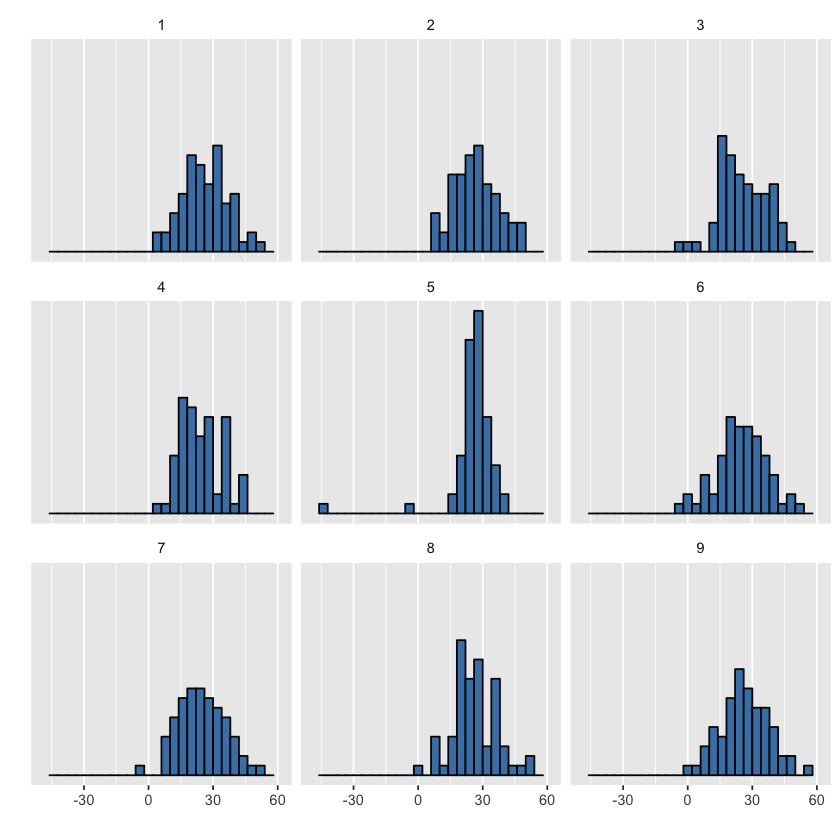

In [47]:
#' Create 9 random replicate data sets from the posterior predictive density.
#' Each set has same number of virtual observations as the original data set.
sampt <- replicate(9, rt(n, n-1)*sqrt(1+1/n)*sd(y)+mean(y)) %>%
  as.data.frame()

#' Replace one of the replicates with observed data.
ind <- sample(9, 1)
sampt_y <- replace(sampt, ind, y) %>% setNames(1:9) %>% gather()

#' If you can spot which one has been replaced, it means
#' that the replicates do not resemble the original data
#' and thus the model has a defect
ggplot(data = sampt_y) +
  geom_histogram(aes(x = value), fill = 'steelblue',
                 color = 'black', binwidth = 4) +
  facet_wrap(~key, nrow = 3) +
  coord_cartesian(xlim = c(round(min(sampt_y$value))-5, round(max(sampt_y$value))+5)) +
  labs(x = '', y = '') +
  scale_y_continuous(breaks=NULL) +
  theme(strip.background = element_blank())

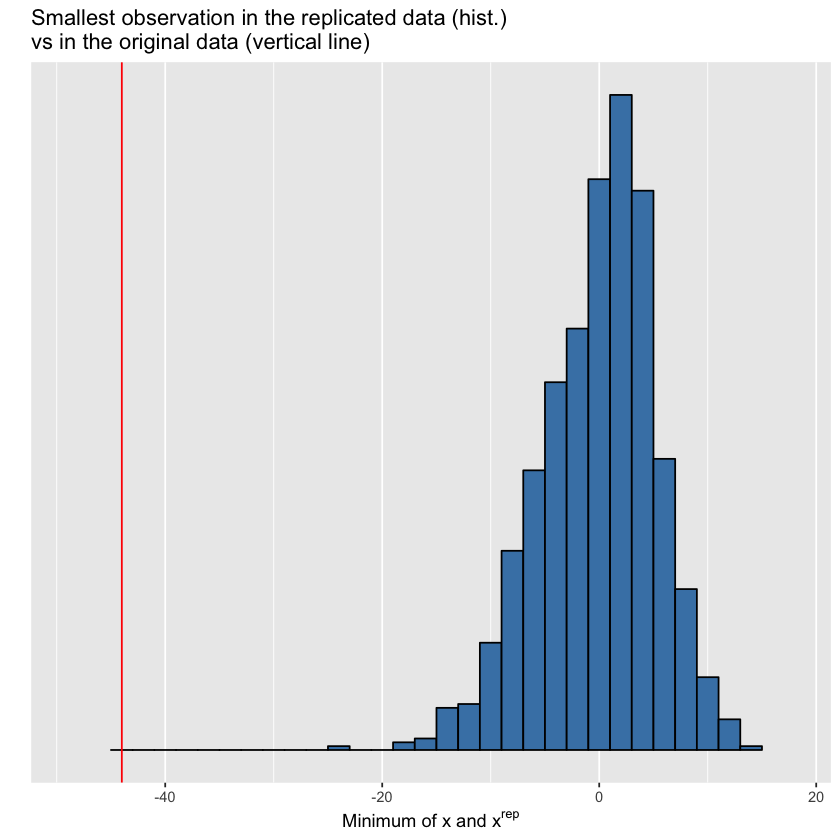

In [66]:
#' Generate 1000 replicate data sets and compute test statistic. 
sampt1000 <- replicate(1000, rt(n, n-1)*sqrt(1+1/n)*sd(y)+mean(y)) %>%
  as.data.frame()

# The test statistic here is the smallest observation in the data or in the replicated data.
minvals <- data.frame(x = sapply(sampt1000, min))

#' Plot test statistic for the data and the replicated data sets
title1 <- 'Smallest observation in the replicated data (hist.)  
vs in the original data (vertical line)'

ggplot(data = minvals) +
  geom_histogram(aes(x = x), fill = 'steelblue',
                 color = 'black', binwidth = 2) +
  geom_vline(aes(xintercept = min(x)), data = data.frame(x = y),
             color = 'red') +
  coord_cartesian(xlim = c(round(min(y,minvals$x)) - 5, round(min(max(y),max(minvals$x)) + 5))) +
  labs(x = expression(paste('Minimum of ',x,' and ',x^rep)),
       y = '', title = title1) +
  scale_y_continuous(breaks=NULL)



The normal model clearly does not capture the variation that Newcomb observed


**Example of poorly chosen test statistic**

Here the test statistic is the **variance** of the data, which is also one of the parameters in the model.

It is not a good choice as the model has variance parameter and the posterior of that parameter has been updated by the same data used now in checking.

In [57]:
sampt_vars <- data.frame(x = sapply(sampt1000, var))

In [75]:
# P-value is computed as the proportion of replicated data could be more extreme than observed data
# Pr(T(x^rep,theta) >= T(x,theta)|x)
p.value = length(which(sampt_vars > var(y)))/1000
p.value

[1] 0.59

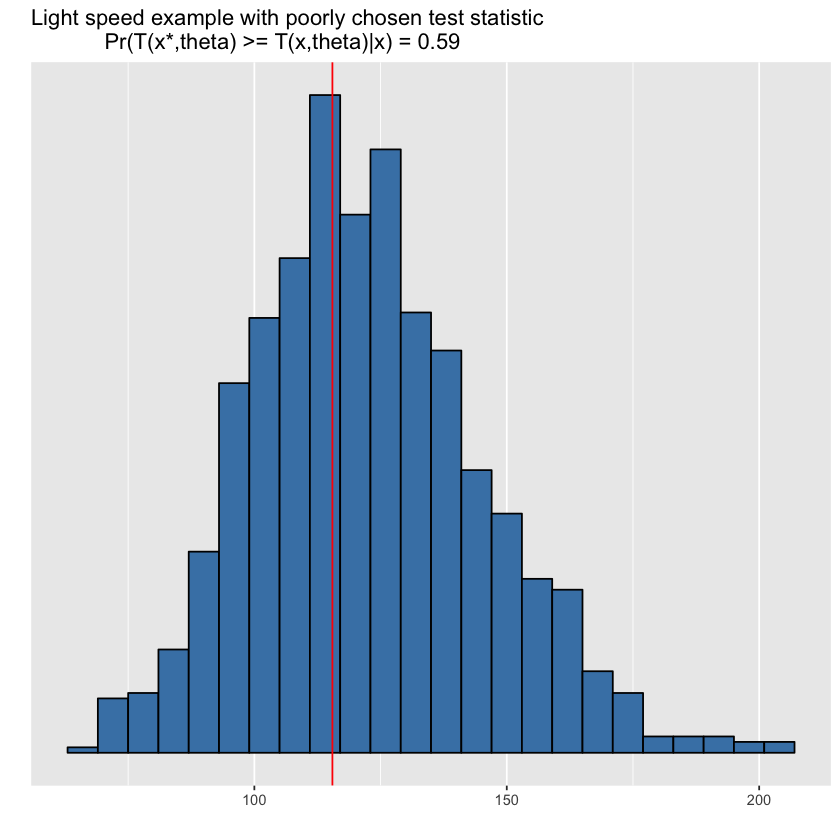

In [76]:
# Plot test statistics for the data and replicates. 
# Vertical line corresponds to the original data, and the histogram to the replicate data.
title1 <- paste('Light speed example with poorly chosen test statistic
            Pr(T(x*,theta) >= T(x,theta)|x) =',p.value)

ggplot(data = sampt_vars) +
  geom_histogram(aes(x = x), fill = 'steelblue',
                 color = 'black', binwidth = 6) +
  geom_vline(aes(xintercept = x), data = data.frame(x = sd(y)^2),
             color = 'red') +
  labs(x = '', y = '', title = title1) +
  scale_y_continuous(breaks=NULL)
